In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
Datasets = pd.read_csv("C:/Users/admin/Desktop/project/Credit_Card_Fraud_Detection/creditcard.csv")
Datasets

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Information regarding this datasets sourced from kaggle:

The datasets are confidential from an unnamed banks. The columns coded from VI to V28 are coded to keep vital informatons related to the bank transaction and are scaled accordingly.

Only the time and the amount columns are not scaled

In [3]:
Datasets["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data Exploratory analysis

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
Datasets.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
Datasets.isnull().sum()  #  clearly, there is no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
 Datasets.info()  # We have 29 featuters columns and 1 target column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Chekcing the percentage distribution of the target columns for imbalance data

In [8]:


target = {0: "No Fraud",
         1:"Fraud"}
Data = Datasets.copy()
Data["Class"].map(target).value_counts(normalize = True)*100


# cLearly, this target are clearly unevenly distributed.
# The inmbalance data needed to be balnace by Resamoling

# over 99% of the target data are non fraud transaction

No Fraud   99.83
Fraud       0.17
Name: Class, dtype: float64

# Exploratry Data analysis

In [11]:
# Using countplot to see the distribution of the imbalance data

<AxesSubplot:xlabel='Class', ylabel='count'>

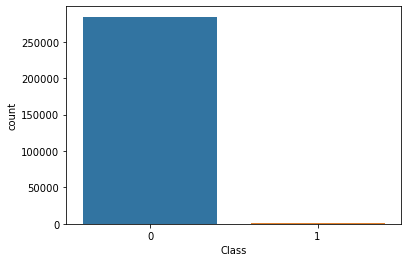

In [9]:
sb.countplot(data = Datasets, x = "Class")

# This shows an imbalance distribution in our data and this will overfit and affect the model prediction

<AxesSubplot:xlabel='V19', ylabel='Density'>

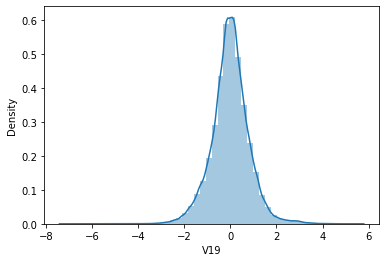

In [10]:
sb.distplot(Datasets["V19"])

<AxesSubplot:xlabel='V17', ylabel='Density'>

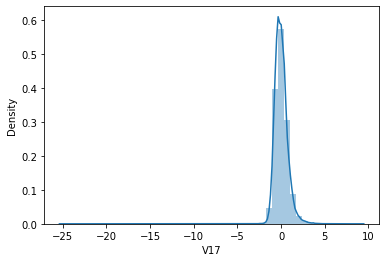

In [11]:
sb.distplot(Datasets["V17"])

<AxesSubplot:xlabel='V10', ylabel='Density'>

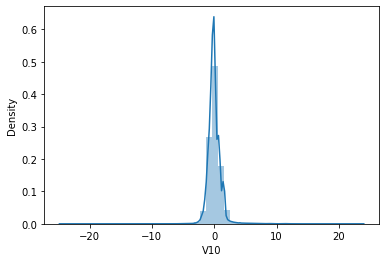

In [12]:
sb.distplot(Datasets["V10"])

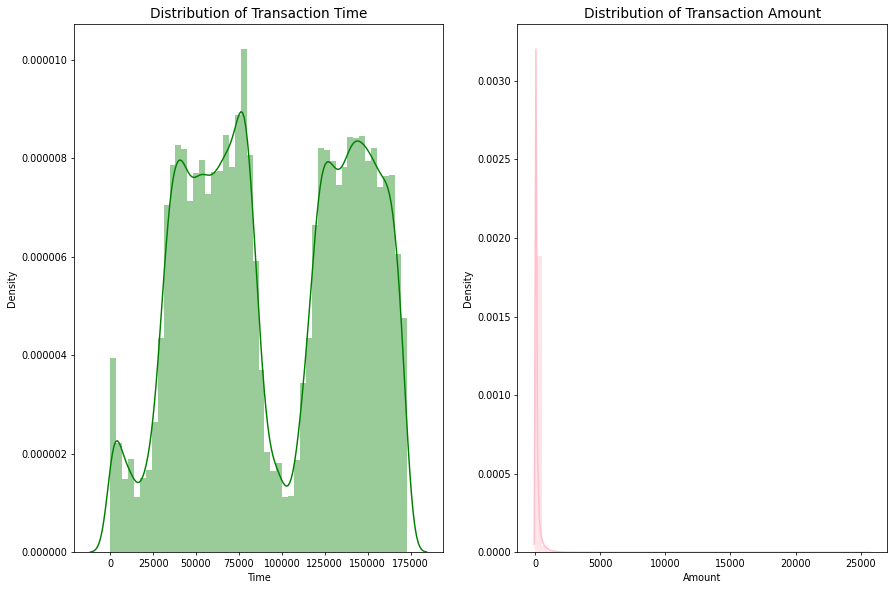

In [13]:
fig, axes = plt.subplots(nrows = 1,  ncols = 2, dpi = 70, figsize = (15,10))
sb.distplot(Datasets["Time"],  ax = axes[0], kde = True, color = "g")
axes[0].set_title("Distribution of Transaction Time", size = 14)

sb.distplot(Datasets["Amount"],  ax = axes[1], kde = True, color = "pink")
axes[1].set_title("Distribution of Transaction Amount", size = 14)

axes[0].ticklabel_format(style='plain') 




#The distribution for both density Amount and Time is spearsely disributed following a normal distribution

In [14]:
#  Normalizing The Time and Money Features

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaled_Features = Scaler.fit_transform(Datasets[["Time", "Amount"]])

Datasets[["Time", "Amount"]] = Scaled_Features
Datasets

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0.24,0
1,-2.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,-0.34,0
2,-2.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,1.16,0
3,-2.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0.14,0
4,-2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,-0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.64,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,-0.35,0
284803,1.64,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,-0.25,0
284804,1.64,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,-0.08,0
284805,1.64,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,-0.31,0


In [15]:
Data = Datasets.copy()

#  Correlation between datasets

In [16]:
corr = Datasets.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,-0.00,0.00,-0.00,1.00,-0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,0.00,0.00,-0.00,1.00,0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.40,-0.19
V8,-0.04,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,1.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.10,0.02
V9,-0.01,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,1.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.04,-0.10


<AxesSubplot:>

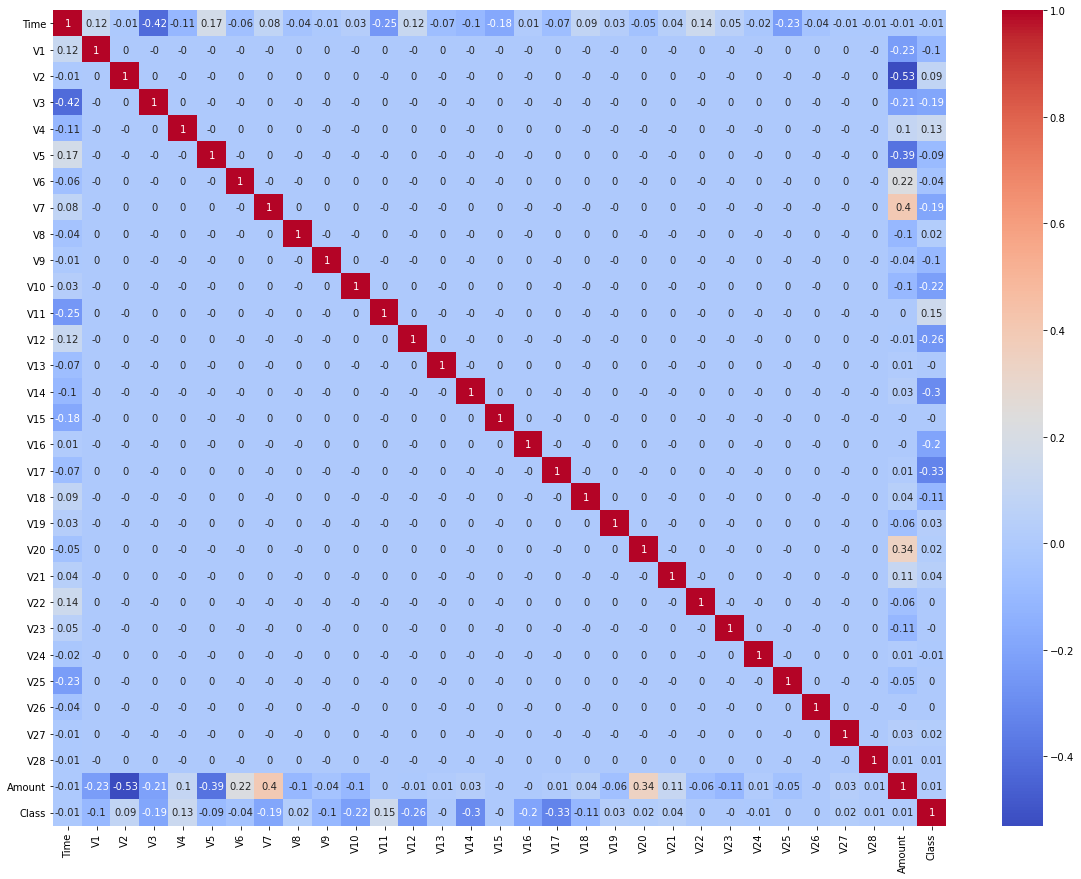

In [17]:
plt.figure(figsize = (20,15))
sb.heatmap(corr.round(2),  annot = True, cmap = "coolwarm", fmt = "g" )

In [18]:
corr = corr["Class"].sort_values(ascending = False)
corr

Class     1.00
V11       0.15
V4        0.13
V2        0.09
V21       0.04
V19       0.03
V20       0.02
V8        0.02
V27       0.02
V28       0.01
Amount    0.01
V26       0.00
V25       0.00
V22       0.00
V23      -0.00
V15      -0.00
V13      -0.00
V24      -0.01
Time     -0.01
V6       -0.04
V5       -0.09
V9       -0.10
V1       -0.10
V18      -0.11
V7       -0.19
V3       -0.19
V16      -0.20
V10      -0.22
V12      -0.26
V14      -0.30
V17      -0.33
Name: Class, dtype: float64

In [19]:
#  Clearly, The The strongly correlated negative features at the bottom 5 and The top 3 correlated Features strongly suggest if a transaction is fraudulent or otherwise.

#  I will be making emphasis to remove the outliers in these features using maximum zcore of 3 unit

# Removing Outliers

I have to be very careful to remove the outliers in the original datsets to avoid massive data leakage and risk underfitting the model built on this data<br>
for this reason, I will be focusing on the highly correlated features for the outliers removal

In [20]:

Top5NegativeCorr = corr[-5:]
Top2PositiveCorr = corr[1:3]

TopCorr = Top5NegativeCorr.append(Top2PositiveCorr)
TopCorr

V16   -0.20
V10   -0.22
V12   -0.26
V14   -0.30
V17   -0.33
V11    0.15
V4     0.13
Name: Class, dtype: float64

In [21]:
from scipy.stats import zscore

In [22]:
Data = Datasets.copy()  #  Keepind a copy of the datsets to visualize and compare the removal of outliers from the Datastes with removed outliers

In [23]:
outliers = []
for index in TopCorr.index:
    score = np.abs(zscore(Data[index]))
    outlier = Data[index][score>3]
    outliers.append(outlier.index)
    

In [24]:
outliers

[Int64Index([     2,     83,    282,    351,    608,    614,    637,    839,
                997,   1078,
             ...
             283066, 283103, 283515, 283554, 284154, 284414, 284444, 284488,
             284508, 284605],
            dtype='int64', length=2077),
 Int64Index([    82,    146,    190,    225,    290,    362,    544,    559,
                601,    673,
             ...
             284407, 284420, 284448, 284479, 284517, 284649, 284713, 284765,
             284795, 284802],
            dtype='int64', length=3488),
 Int64Index([  2951,   2954,   2957,   3994,   4010,   4018,   4027,   4034,
               4052,   4069,
             ...
             279863, 280143, 281144, 282836, 282846, 282855, 282863, 282881,
             282903, 284249],
            dtype='int64', length=3393),
 Int64Index([   102,    108,    225,    362,    366,    418,    457,    458,
                538,    541,
             ...
             284181, 284246, 284393, 284407, 284420, 284448, 284

In [25]:
All_Outliers = np.hstack(outliers)
All_Outliers

array([     2,     83,    282, ..., 284711, 284712, 284782], dtype=int64)

In [26]:
new_df = Data.drop(All_Outliers)
new_df["Class"].value_counts()

0    271524
1        61
Name: Class, dtype: int64

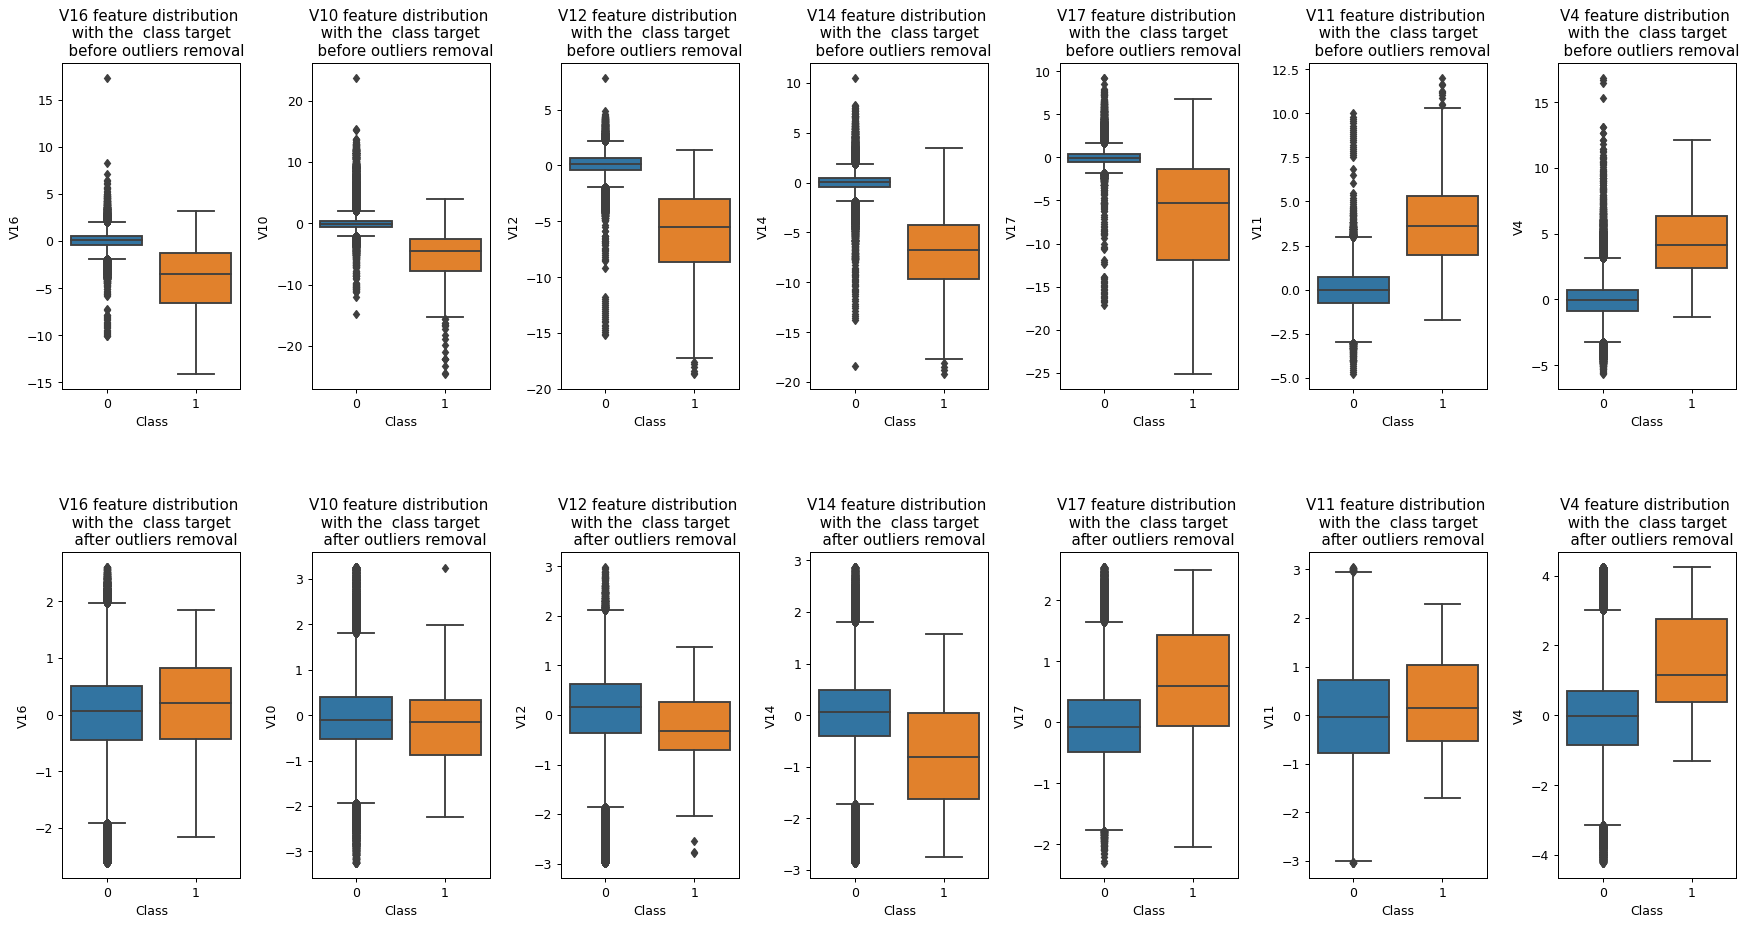

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 7, figsize = (24,12), dpi = 90)

# Boxplot befor the removal of outliers


sb.boxplot(x= "Class", y = "V16", ax = axes[0,0], data = Data)
axes[0,0].set_title("V16 feature distribution \n with the  class target \n  before outliers removal")

sb.boxplot(x= "Class", y = "V10", ax = axes[0,1], data = Data)
axes[0,1].set_title("V10 feature distribution \n with the  class target \n  before outliers removal")


sb.boxplot(x= "Class", y = "V12", ax = axes[0,2], data = Data)
axes[0,2].set_title("V12 feature distribution \n with the  class target \n  before outliers removal")

sb.boxplot(x= "Class", y = "V14", ax = axes[0,3], data = Data)
axes[0,3].set_title("V14 feature distribution \n with the  class target \n  before outliers removal")

sb.boxplot(x= "Class", y = "V17", ax = axes[0,4], data = Data)
axes[0,4].set_title("V17 feature distribution \n with the  class target \n  before outliers removal")

sb.boxplot(x= "Class", y = "V11", ax = axes[0,5], data = Data)
axes[0,5].set_title("V11 feature distribution \n with the  class target \n  before outliers removal")

sb.boxplot(x= "Class", y = "V4", ax = axes[0,6], data = Data)
axes[0,6].set_title("V4 feature distribution \n with the  class target \n  before outliers removal")


#  Boxplots after the removal of outliers

sb.boxplot(x= "Class", y = "V16", ax = axes[1,0], data = new_df)
axes[1,0].set_title("V16 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V10", ax = axes[1,1], data = new_df)
axes[1,1].set_title("V10 feature distribution \n with the  class target \n  after outliers removal")


sb.boxplot(x= "Class", y = "V12", ax = axes[1,2], data = new_df)
axes[1,2].set_title("V12 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V14", ax = axes[1,3], data = new_df)
axes[1,3].set_title("V14 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V17", ax = axes[1,4], data = new_df)
axes[1,4].set_title("V17 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V11", ax = axes[1,5], data = new_df)
axes[1,5].set_title("V11 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V4", ax = axes[1,6], data = new_df)
axes[1,6].set_title("V4 feature distribution \n with the  class target \n  after outliers removal")




plt.subplots_adjust(wspace= 0.4, hspace= 0.5 )




#   A substantial data points in each of the selected columns have been removed as outliers as shown above.

In [28]:
#  There is need to move the zscore further to accomodae more data and remove the most extreme outliers
# The zscore for the outliers after experimentation is set to 11 to avoid too much data leakage 

In [29]:
outliers = []
for index in TopCorr.index:
    score = np.abs(zscore(Data[index]))
    outlier = Data[index][score>11]
    outliers.append(outlier.index)
outliers = np.hstack(outliers)

In [30]:
new_df = Data.drop(outliers)
new_df["Class"].value_counts()

0    284238
1       300
Name: Class, dtype: int64

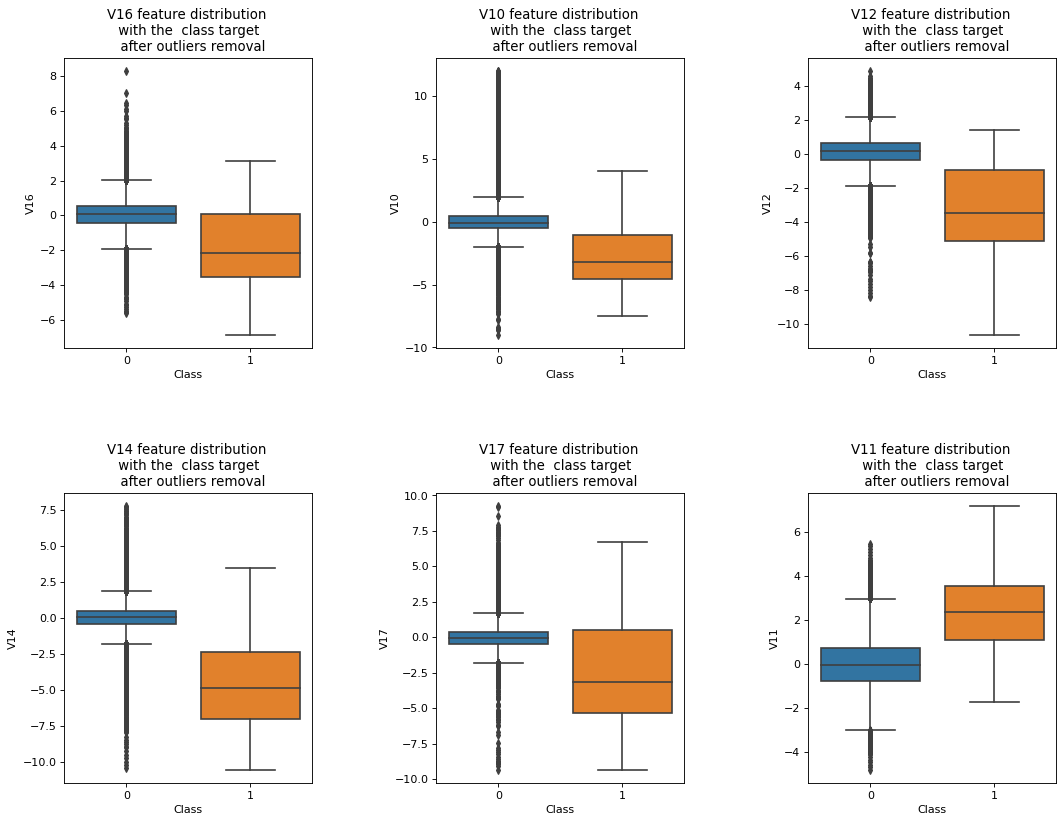

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,12), dpi = 80)

sb.boxplot(x= "Class", y = "V16", ax = axes[0,0], data = new_df)
axes[0,0].set_title("V16 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V10", ax = axes[0,1], data = new_df)
axes[0,1].set_title("V10 feature distribution \n with the  class target \n  after outliers removal")


sb.boxplot(x= "Class", y = "V12", ax = axes[0,2], data = new_df)
axes[0,2].set_title("V12 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V14", ax = axes[1,0], data = new_df)
axes[1,0].set_title("V14 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V17", ax = axes[1,1], data = new_df)
axes[1,1].set_title("V17 feature distribution \n with the  class target \n  after outliers removal")

sb.boxplot(x= "Class", y = "V11", ax = axes[1,2], data = new_df)
axes[1,2].set_title("V11 feature distribution \n with the  class target \n  after outliers removal")



plt.subplots_adjust(wspace= 0.5, hspace= 0.5 )



In [32]:
# Extreme outliers in the datasets are now removed preserving reasonable datapoints in the datsetets

new_df["Class"].value_counts()

0    284238
1       300
Name: Class, dtype: int64

# Sampling of of the Imbalance Data

In [44]:

import imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Oversampling the Minority Data

In [37]:
Oversample  = RandomOverSampler(sampling_strategy = "minority")
X = new_df.drop("Class", axis = 1)
Y = new_df["Class"]

In [38]:
Over_X, Over_Y = Oversample.fit_resample(X,Y)



In [39]:
Over_Y.value_counts()

0    284238
1    284238
Name: Class, dtype: int64

# I will be Using 5 classification algorithms to cross validate the data in 5 folds to get the best algorithm to use.
1. Logistics Regression
2. Knearest Neighbors
3. Decision Tree
4. Support Vector Machine Classifier
5. Random forest Classifier


First we need to split the data into  train and validation set to see how the model is performing on Unseen data in each randomized folds.
The average validation acuracy score of each folds for each algorithm is comapre to get the best performing model


In [40]:
X_Train_Over, X_Test_Over, Y_Train_Over, Y_Test_Over = train_test_split(Over_X, Over_Y, random_state = 42, test_size = 0.2, shuffle = True)
(X_Train_Over.shape, X_Test_Over.shape), (Y_Train_Over.shape, Y_Test_Over.shape)

(((454780, 30), (113696, 30)), ((454780,), (113696,)))

Classifiers = {
    
    "LogisticsRegression": LogisticRegression(),
    
    "Kneighbours": KNeighborsClassifier(n_neighbors = 2),
    
    "SupportVector": SVC(),
    
    "DecisionTree" : DecisionTreeClassifier(max_depth = 4),
    
    "RandomForest" : RandomForestClassifier()
    
    }
score = []
for name,  classifier in Classifiers.items():
    n_folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
    cv_score = cross_val_score(classifier, X_Train_Over, Y_Train_Over, cv = n_folds, scoring = "accuracy")
    score.append(cv_score)
    print(f"{name} accuracy is: {np.mean(score)}")
    print()

In [63]:
# Logistics egression outperform other Algorithm

# Implementing StratifiedKfolds on the algorithm to better get the performance on the validation on 5 folds.

In [42]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

In [45]:
score = 0
Accuracy = []
for fold, (train_index, test_index) in enumerate(folds.split(Over_X, Over_Y)):
    #print(Train_index, Test_index)
    Fold_X_Train = Over_X.iloc[train_index]
    Fold_Y_Train = Over_Y[train_index]
    Fold_X_Test = Over_X.iloc[test_index]
    Fold_Y_Test = Over_Y[test_index]
    
    log = LogisticRegression(n_jobs = -1)
    log.fit(Fold_X_Train, Fold_Y_Train)
    pred = log.predict(Fold_X_Test)
    accuracy = accuracy_score(Fold_Y_Test, pred)
    score+= log.score(Fold_X_Test, Fold_Y_Test)
    Accuracy.append(accuracy)
    print(f"fold {fold+1}: accuracy: {accuracy.round(2)}")
    print()
    
    
#print(score/folds.n_splits)
print(f" Average Validation accuracy: {np.mean(Accuracy)}")

    
    
    

fold 1: accuracy: 0.93

fold 2: accuracy: 0.93

fold 3: accuracy: 0.93

 Average Validation accuracy: 0.9294816315904278


# Oversample Data Reached an average validation accuracy of 92.9% 

#  Undersampling the data

In [56]:
UnderSample = RandomUnderSampler(sampling_strategy = "majority")
Under_X, Under_Y = UnderSample.fit_resample(X, Y)

In [57]:
Under_Y.value_counts()

0    300
1    300
Name: Class, dtype: int64

In [68]:
X_Train_Under, X_Test_Under, Y_Train_Under, Y_Test_Under = train_test_split(Under_X, Under_Y, random_state = 100, test_size = 0.1, shuffle = True)


In [69]:
Classifiers = {
    
    "LogisticsRegression": LogisticRegression(n_jobs = -1 ),
    
    "Kneighbours": KNeighborsClassifier(n_neighbors = 2),
    
    "SupportVector": SVC(),
    
    "DecisionTree" : DecisionTreeClassifier(max_depth = 4),
    
    "RandomForest" : RandomForestClassifier()
    
    }
score = []
for name,  classifier in Classifiers.items():
    n_folds = KFold(n_splits = 3, shuffle = True, random_state = 42)
    cv_score = cross_val_score(classifier, X_Train_Under, Y_Train_Under, cv = folds, scoring = "accuracy")
    score.append(cv_score)
    print(f"{name} accuracy is: {np.mean(score)}")
    print()

    
    

LogisticsRegression accuracy is: 0.9018518518518519

Kneighbours accuracy is: 0.9

SupportVector accuracy is: 0.9024691358024691

DecisionTree accuracy is: 0.8949074074074074

RandomForest accuracy is: 0.8977777777777777



In [61]:
#  Logistics regression outperform other classifiers

In [70]:
score = 0
Accuracy = []
for fold, (train_index, test_index) in enumerate(folds.split(Under_X, Under_Y)):
    #print(Train_index, Test_index)
    Fold_X_Train = Under_X.iloc[train_index]
    Fold_Y_Train = Under_Y[train_index]
    Fold_X_Test = Under_X.iloc[test_index]
    Fold_Y_Test = Under_Y[test_index]
    
    Log = LogisticRegression(n_jobs = -1 )
    Log.fit(Fold_X_Train, Fold_Y_Train)
    pred = Log.predict(Fold_X_Test)
    accuracy = accuracy_score(Fold_Y_Test, pred)
    score+= Log.score(Fold_X_Test, Fold_Y_Test)
    Accuracy.append(accuracy)
    print(f"fold {fold+1}: accuracy: {accuracy.round(2)}")
    print()
    
    
#print(score/folds.n_splits)
print(f"Average cross validation scrore: {np.mean(Accuracy).round(2)}")

fold 1: accuracy: 0.9

fold 2: accuracy: 0.96

fold 3: accuracy: 0.9

Average cross validation scrore: 0.92


The Logistics regression performs very well on the each folds validation reaching as high as 92% in 4 folds

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
#Training the model on the training set
LogR = LogisticRegression(n_jobs = -1)
LogR.fit(X_Train_Under, Y_Train_Under)

LogisticRegression(n_jobs=-1)

In [74]:
Under_pred = LogR.predict(X_Test_Under)

In [75]:
cm = confusion_matrix(Y_Test_Under, Under_pred)

# # Performace on Test Set

In [77]:
accuracy_score(Y_Test_Under, pred)  #  93.3% on the test set

0.9

For A fraud detection Problems, we care more about the alogorithms making less false Positive,  i.e Fraudulent Transaction mistakenly classified as non fraudulents.

We have 3 fruadulent transaction mistakenly classified as fraudulent trasaction.

The algorithm with the True Negative (Non Fraudulent transacton) are 34 misclassifying it as Fraudulent only one time.

The Algorithm is doing well generally on the test data based on the visuals from the confusion matrix

Text(0.5, 1.0, 'Logistics Regression Classifier \n confusion matrix')

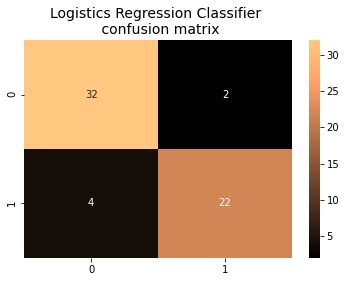

In [78]:
sb.heatmap(cm, annot = True, cmap = plt.cm.copper, fmt = "g")
plt.title("Logistics Regression Classifier \n confusion matrix", size = 14)


In [90]:
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report


In [91]:
print(classification_report(Y_Test, pred))

'''recall of 0.88 for Fraud Transaction (class 1) is a big plus in detecting actual fraud transaction.
the overall f1score of 0.93 also shows positivity in detectung fraud in the datasets.'''

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.95      0.84      0.89        25

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



'recall of 0.88 for Fraud Transaction (class 1) is a big plus in detecting actual fraud transaction.\nthe overall f1score of 0.93 also shows positivity in detectung fraud in the datasets.'

# Visualizing Metrics for the Over_Sample Data

In [79]:
X_Train_Over, X_Test_Over, Y_Train_Over, Y_Test_Over = train_test_split(Over_X, Over_Y)

In [80]:
LogOver = LogisticRegression(n_jobs = -1)
LogOver.fit(X_Train_Over, Y_Train_Over)

LogisticRegression(n_jobs=-1)

KNN_precision, KNN_recall, KNN_Threshold = precision_recall_curve(Y_Train_Over, KNN_Score)

In [125]:
LogOver.score(X_Test_Over, Y_Test_Over)

0.9290453774653635

In [130]:
LogOver_pred = LogOver.predict(X_Test_Over)

<AxesSubplot:>

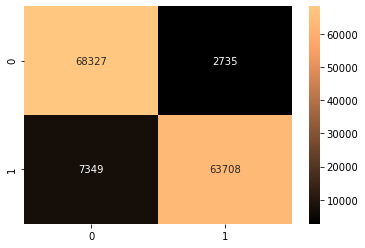

In [138]:
sb.heatmap(confusion_matrix(Y_Test_Over, LogOver_pred), annot = True, cmap = plt.cm.copper, fmt = "g")



In [140]:
print(classification_report(Y_Test_Over, LogOver_pred))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93     71062
           1       0.96      0.90      0.93     71057

    accuracy                           0.93    142119
   macro avg       0.93      0.93      0.93    142119
weighted avg       0.93      0.93      0.93    142119



Because of massive duplication of data, A lot of false Positive and negative are recoreded for both Fraudulent and  non Fraudulent Transactions
Classification reports. <br> on the other hand, a higher precision for both cass at 90% and 96% respectively.

However, The recall fall to 90% for the Positive class

F1score of 93% sows good prospect for the algorithm performance

In [ ]:
Score_Over = cross_val_predict(LogOver, X_Train_Over, Y_Train_Over, cv = 10, method = "decision_function")

In [1402]:
precision, recall, threshold = precision_recall_curve(Y_Train_Over, score)

Text(0.5, 1.0, 'Precision recall Curve')

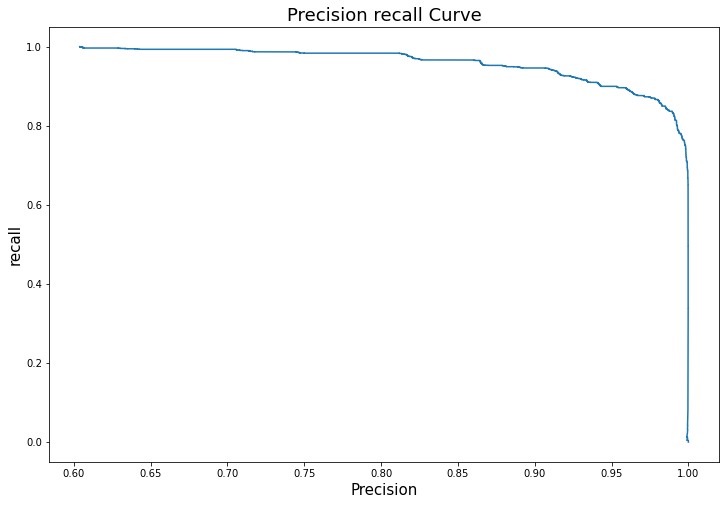

In [1410]:
plt.figure(figsize = (12,8))
plt.plot(precision, recall)
plt.xlabel("Precision", size = 15)
plt.ylabel("recall", size = 15)
plt.title("Precision recall Curve", size = 18)

The Racall steeply start decaying when the precision is above 90%.

#  ROC Curve

In [1414]:
fpr, tpr, threshholds = roc_curve(Y_Train_Over, score)

([<matplotlib.axis.YTick at 0x23f09e0d5c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

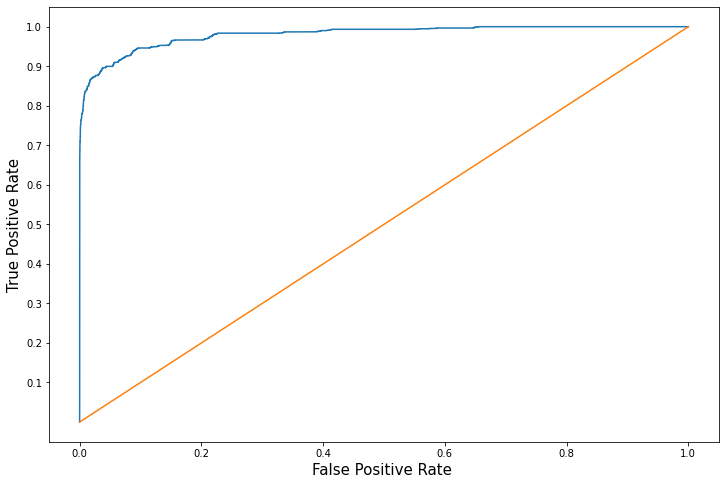

In [1444]:
plt.figure(figsize = (12,8))
plt.xlabel("False Positive Rate ", size = 15)
plt.ylabel("True Positive Rate", size = 15)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.yticks(np.linspace(0.1,1.0,10))
#plt.grid()

In [104]:
Output = {"Oversample": [10],
         "Undersample": [5]}

In [105]:
pd.DataFrame(Output)

,Oversample,Undersample
0,10,5
